# pyeval

The present notebook illustrates the usage of `pyeval` for the fast, simple and modular evaluation of atomic physics images.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import numpy as np
from pathlib import Path

project_root = Path().absolute().parent
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

In [6]:
import matplotlib.pyplot as plt

%matplotlib ipympl

In [9]:
from pyeval import GzipPickleDataset, Evaluator

In [10]:
dataset = GzipPickleDataset("/tmp/AA_clock_spect_0G")

In [11]:
len(dataset)

767

In [12]:
evaluator = Evaluator(num_spots=16)
evaluator.evaluate(dataset)

In [13]:
evaluator.spots

array([[ 21.53274406,  13.95434619],
       [ 22.59409121,  33.17708597],
       [ 23.07596973,  51.65854585],
       [ 24.03339624,  70.74861771],
       [ 25.03614336,  89.69603578],
       [ 25.48337109, 108.52420818],
       [ 26.31777528, 127.2735696 ],
       [ 26.87455136, 146.20979785],
       [ 27.6318066 , 164.97656851],
       [ 28.69560447, 184.16794548],
       [ 29.38748694, 203.01644947],
       [ 30.0596636 , 222.02183826],
       [ 30.78462466, 240.60687831],
       [ 31.83203418, 259.44115978],
       [ 32.6424282 , 278.23089519],
       [ 33.15915907, 297.22163164]])

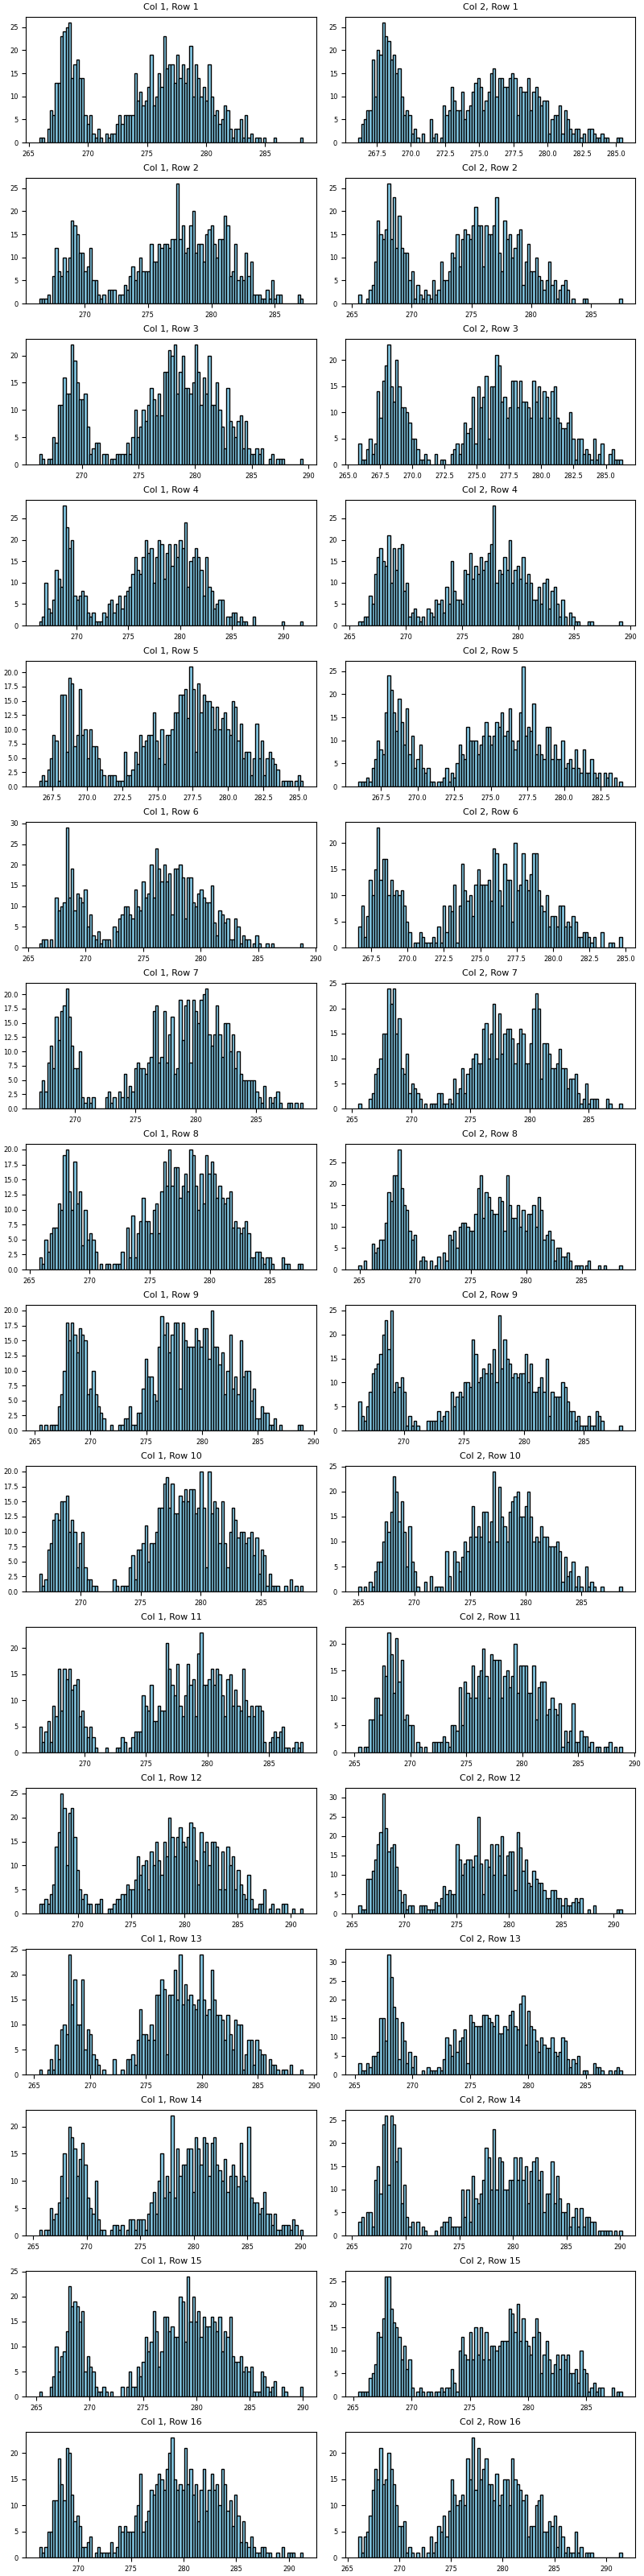

In [14]:
data = evaluator.photon_counts

ncols = data.shape[1]
nrows = data.shape[2]

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8, 32), constrained_layout=True)

for col in range(ncols):
    for row in range(nrows):
        ax = axes[row, col]
        ax.hist(data[:, col, row], bins=100, color='skyblue', edgecolor='black')
        ax.set_title(f'Col {col+1}, Row {row+1}', fontsize=8)
        ax.tick_params(axis='both', which='major', labelsize=6)

plt.show()


In [15]:
hist, binedges = np.histogram(data[:, 0, 0], bins=100, density=True)
hist.shape, binedges.shape

((100,), (101,))

[]

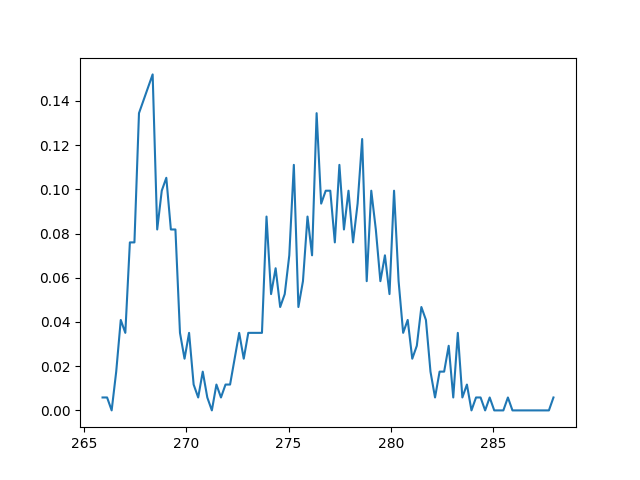

In [16]:
plt.figure()
plt.plot(binedges[:-1], hist)
plt.plot()

In [17]:
from sklearn.mixture import GaussianMixture

In [23]:
binedges.dtype, hist.dtype

(dtype('float64'), dtype('float64'))

In [65]:
binedges.dtype

dtype('float64')

In [26]:
bincenters = (binedges[:-1] + binedges[1:])/2

In [28]:
binwidths = np.diff(binedges)

In [31]:
gmm = GaussianMixture(2)
gmm.fit(bincenters.reshape(-1, 1), sample_weight=hist * binwidths)

x = np.linspace(binedges[0], binedges[-1], 100)
y = np.exp(gmm.score_samples(x.reshape(-1, 1)))

#plt.bar(binedges[:-1], hist)
plt.plot(x, y)
plt.show()

TypeError: BaseMixture.fit() got an unexpected keyword argument 'sample_weight'